# Import library and load dataset

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'playground-series-s4e6:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F73290%2F8710574%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240611%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240611T084628Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5db042e735486ad61362f649d1dd1bbc5fafb68480653aa06ced7a5ede449d47053af29414f1541a4f74ce1217d6a5dde885c374584250dda139ca11268f47bf58a8d16448e0def85b1ee6014b9c619926bcd123e42336b514304f53b9f4301f1d40febdb3c0a7674ccb256aac70e23c06879e545cf1ec7ec3f2e7dc4a4042de483c797c81d55dbd9ac1cc2e6c897cfa5cbf17750b94d71c4eff73e75f40e3e73d9c77ef86000e6ecb4bd4e9c55bccd079202bbacc05df65d2b84d03d7fb605b3f56d2b0bc6944df6eeefe9b87fa5d4eac53a59395e44bdc0b4c29980c3dfcd3a6cbf4399d5a4d85b92a219dd65bb39942784ad283dbc75e578a9f040bb56924'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 3217279 bytes downloaded
Downloaded and uncompressed: playground-series-s4e6
Data source import complete.


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e6/train.csv
/kaggle/input/playground-series-s4e6/test.csv
/kaggle/input/playground-series-s4e6/sample_submission.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Regularization, Estimator
from sklearn.linear_model import Lasso,ElasticNet,Ridge
from sklearn.model_selection import cross_val_score, validation_curve, GridSearchCV
from sklearn.metrics import * # RMSLE, RMSE, r2, accuracy_score

from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Classifier
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *

# Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Scaler, Encoder, Regulariation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# Neural Network
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import *
from sklearn.pipeline import make_pipeline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.regularizers import *

In [ ]:
train = pd.read_csv('/kaggle/input/playground-series-s4e6/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e6/test.csv')
submission = pd.read_csv('/kaggle/input/playground-series-s4e6/sample_submission.csv')

# Preparation for EDA

In [ ]:
id_train, id_test, y_train = train['id'], test['id'], train['Target']

train = train.drop(['id', 'International', 'Educational special needs'], axis=1)
test = test.drop(['id', 'International', 'Educational special needs'], axis=1)

In [ ]:
num_cols = train.select_dtypes(exclude=object).columns

In [ ]:
y_trans = LabelEncoder().fit_transform(train['Target'])
X_train = train.drop('Target', axis=1)

What I learned from last note
- Na value doesn't exist in dataframe
- Low-corr column exist, but it could be meaningful
- If boundary size is too large, visualization is usless
- Small sample size doesn't always mean outlier
- Usless Features : ['International', 'Educational special needs']


# Visualization

In [ ]:
num_cols = num_cols - ['International', 'Educational special needs']

ValueError: operands could not be broadcast together with shapes (34,) (2,) 

In [ ]:
curr_cols = num_cols[19:-3] # len : 12

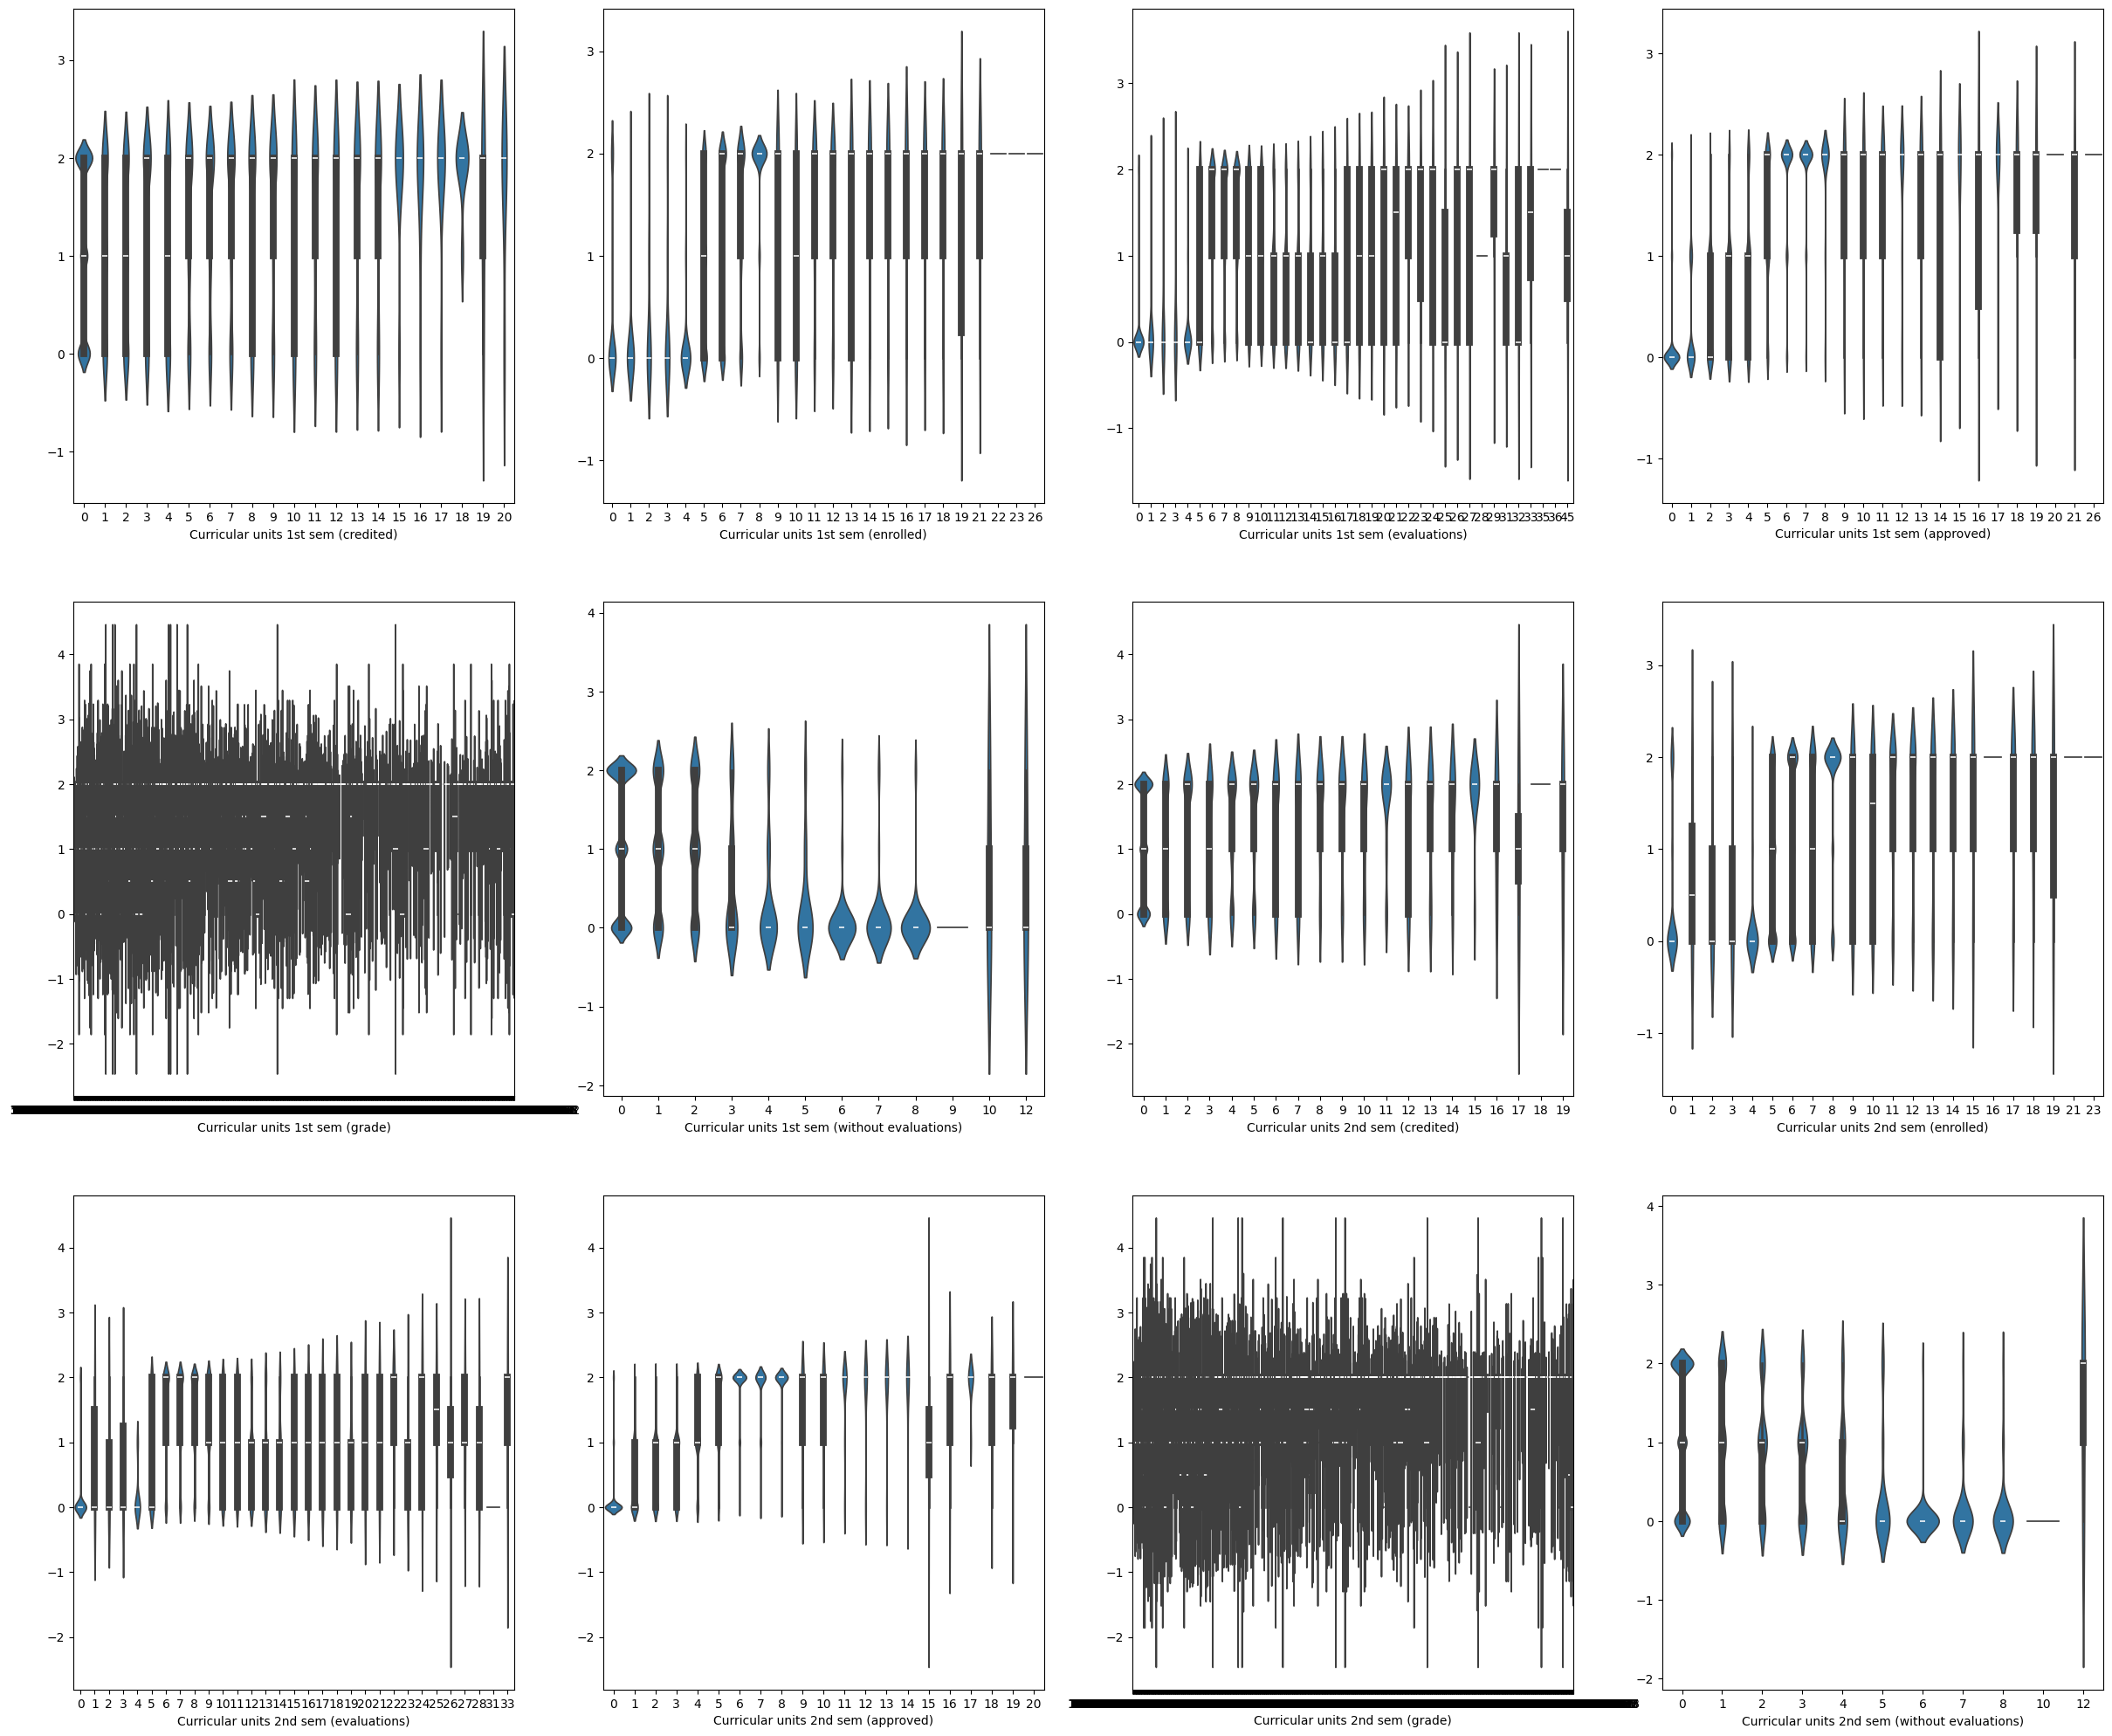

In [ ]:
figure, axes = plt.subplots(nrows=3, ncols=4, label='off', figsize=(30, 25))
n = 0

for i in range(3) :
  for j in range(4) :
    sns.violinplot(x=curr_cols[n], y=y_trans, data=train, ax=axes[i, j])
    axes[i, j].set_ylabel('')
    n += 1

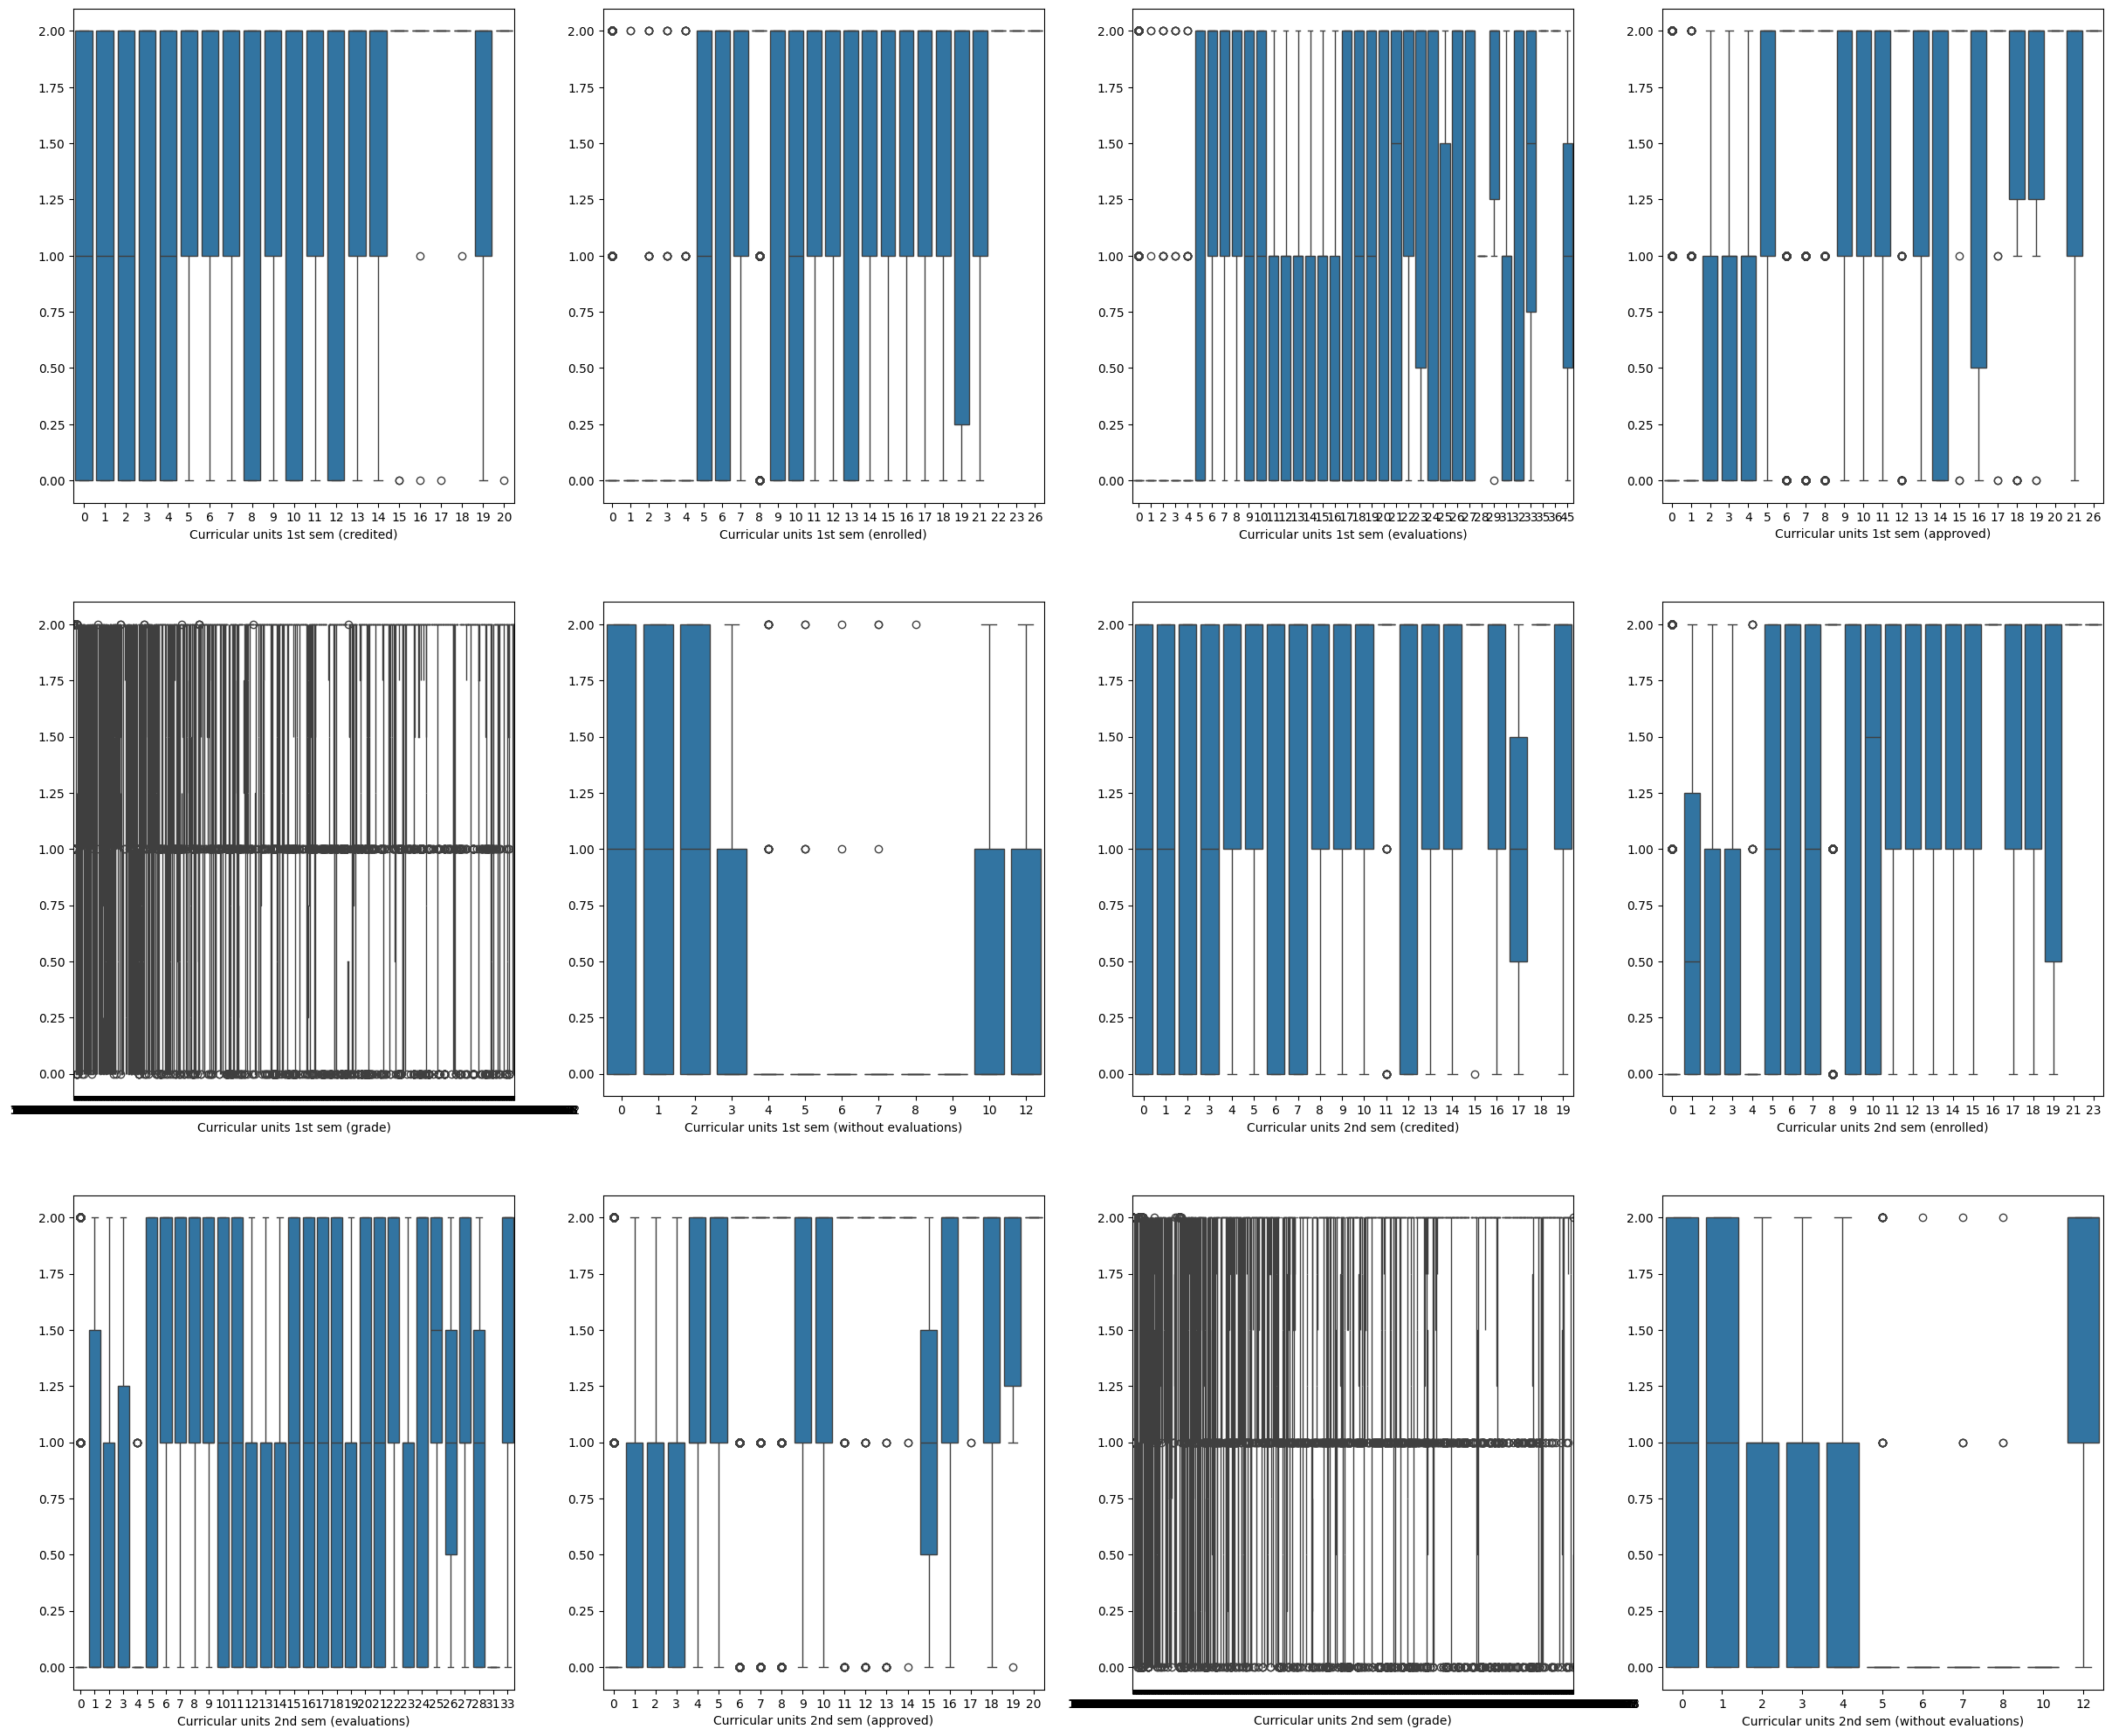

In [ ]:
figure, axes = plt.subplots(nrows=3, ncols=4, label='off', figsize=(30, 25))
n = 0

for i in range(3) :
  for j in range(4) :
    sns.boxplot(x=curr_cols[n], y=y_trans, data=train, ax=axes[i, j])
    axes[i, j].set_ylabel('')
    n += 1

<Axes: xlabel='Admission grade'>

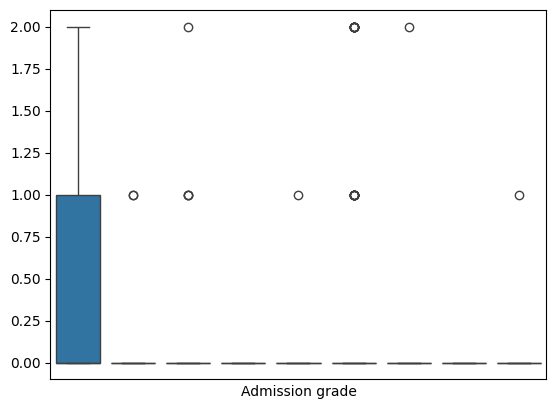

In [ ]:
plt.xticks([100, 110, 120, 130, 140, 150, 160, 170, 180])
sns.boxplot(x=train['Admission grade'], y=y_trans, data=train)

<Axes: xlabel='Admission grade'>

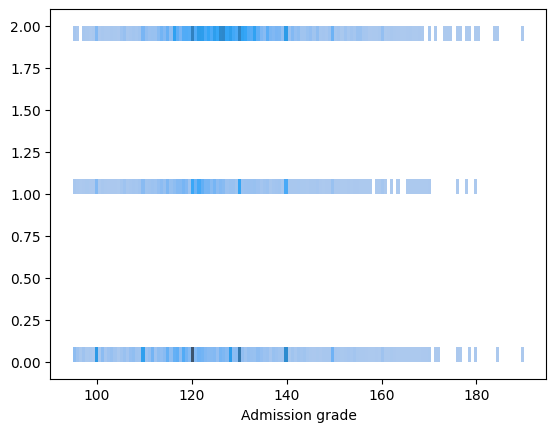

In [ ]:
sns.histplot(x=train['Admission grade'], y=y_trans, data=train)

# Model Baseline

In [ ]:
for col in curr_cols :
  print(X_train[col].value_counts())

Curricular units 1st sem (credited)
0     73429
2       657
1       509
3       412
6       247
4       237
7       224
5       215
8       161
9       105
10       62
11       61
12       52
13       46
14       45
15       17
17       10
16       10
18        8
20        6
19        5
Name: count, dtype: int64
Curricular units 1st sem (enrolled)
6     39160
5     19175
7      8863
8      4850
0      2671
12      365
11      253
10      237
4       185
9       172
13       96
15       93
14       77
17       65
18       60
3        47
2        46
1        41
16       34
21       13
19       10
26        3
22        1
23        1
Name: count, dtype: int64
Curricular units 1st sem (evaluations)
8     15640
7     12943
6     12924
0      7951
9      6017
10     5186
5      4864
11     3156
12     3033
13     1823
14     1001
15      589
16      344
17      219
18      165
4       163
19      101
21       84
20       55
1        47
2        43
22       41
3        34
24       24
23       

# Model : GaussianNB

In [ ]:
X_train.shape, test.shape

((76518, 34), (51012, 34))

In [ ]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_trans)

GaussianNB()

In [ ]:
gnb_pred = gnb_model.predict(test)

In [ ]:
accuracy_score(gnb_model.predict(X_train), y_trans)

0.7658590135654356

In [ ]:
value_list = {2 : 'Graduate', 1 : 'Enrolled', 0 : 'Dropout'}

In [ ]:
pred_list = []

for i in range(len(gnb_pred)) :
  pred_list.append(value_list[gnb_pred[i]])

In [ ]:
gnb_submission = pd.DataFrame({'id':id_test, 'Target':pred_list})
gnb_submission.to_csv('gnb_submission.csv', index=False)

# Model : MLP network

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=[500, 400, 300, 200, 100], max_iter=10_000,
                        random_state=42)

In [ ]:
mlp_clf.fit(X_train, y_trans)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(hidden_layer_sizes=[500, 400, 300, 200, 100], max_iter=10000,
              random_state=42)

In [ ]:
accuracy_score(mlp_clf.predict(X_train), y_trans)

0.804660341357589

In [ ]:
mlp_pred = mlp_clf.predict(test)

NameError: name 'mlp_clf' is not defined

In [ ]:
pred_list = []
value_list = {2 : 'Graduate', 1 : 'Enrolled', 0 : 'Dropout'}

for i in range(len(mlp_pred)) :
  pred_list.append(value_list[mlp_pred[i]])

In [ ]:
mlp_submission = pd.DataFrame({'id':id_test, 'Target':pred_list})
mlp_submission.to_csv('mlp_submission.csv', index=False)